# Path-Finding Algorithms Comparison
### Author: Tomoya Tokunga(mailto: ttokunag@ucsd.edu)
This note compare path finding algorithms used in graph data structure, Breadth-First & Depth-First Search. First, it introduces how the algorithms work, and then compare them from runtime perspective. We consider 2 cases: when the path exists, and does not.<br>
(*For the sake of simplicity, we only consider a case of finding a path between upper-leftmost and lower-rightmost elements in a matrix)

### DFS Traversal
$O(N)$ time | $O(N)$ space (where $N$ is the # of nodes in a graph)

In [1]:
# returns True if the path exists
def path_find_dfs(grid):
    visited = []
    stack = [(0,0)]
    while stack:
        node = stack.pop()
        if node not in visited:
            if node[0]-1 >= 0 and grid[node[0]-1][node[1]] == 1:
                stack.append((node[0]-1, node[1]))
            if node[0]+1 < len(grid) and grid[node[0]+1][node[1]] == 1:
                stack.append((node[0]+1, node[1]))
            if node[1]-1 >= 0 and grid[node[0]][node[1]-1] == 1:
                stack.append((node[0], node[1]-1))
            if node[1]+1 < len(grid[0]) and grid[node[0]][node[1]+1] == 1:
                stack.append((node[0], node[1]+1))
            # destination coordinate
            if (len(grid)-1, len(grid[0])-1) in stack:
                return True
        visited.append(node)
    return False

### BFS Traversal
$O(N)$ time | $O(N)$ space (where $N$ is the # of nodes in a graph)

In [2]:
# returns True if the path exists
def path_find_bfs(grid):
    visited = []
    queue = [(0,0)]
    while queue:
        node = queue.pop(0)
        if node not in visited:
            if node[0]-1 >= 0 and grid[node[0]-1][node[1]] == 1:
                queue.append((node[0]-1, node[1]))
            if node[0]+1 < len(grid) and grid[node[0]+1][node[1]] == 1:
                queue.append((node[0]+1, node[1]))
            if node[1]-1 >= 0 and grid[node[0]][node[1]-1] == 1:
                queue.append((node[0], node[1]-1))
            if node[1]+1 < len(grid[0]) and grid[node[0]][node[1]+1] == 1:
                queue.append((node[0], node[1]+1))
            # destination coordinate
            if (len(grid)-1, len(grid[0])-1) in queue:
                return True
        visited.append(node)
    return False

## Compare the performances
Now we compare 2 functions performance with timing module, `time` and data-plotting module `Pandas` and `pyplot`

In [3]:
# it times runtime and is helpful to compare performance
import time

# a dictionary to call each algorithm
algos = {
        "bfs": path_find_bfs,
        "dfs": path_find_dfs
        }

# a method to print how long a method takes to sort the given array
def timing(grid, algo_name, history):
    start = time.time()
    algos[algo_name](grid)
    # stores the time in a dataset
    history.append(time.time() - start)

### Performance comparison when the path exists
The test case matrices follow the following conditions
- There is only one correct path to reach the goal
- matrices contains at least one cycle if the size is >= 5

In [4]:
# the following 8 examples have a path from upper-leftmost to lower-rightmost
# 3 x 3 grid
grid3 = [[1,0,0],
         [1,1,0],
         [0,1,1]]

# 5 x 5 grid
grid5 = [[1,1,1,1,1],
         [1,0,1,0,1],
         [1,0,1,1,1],
         [1,1,0,0,0],
         [0,1,1,1,1]]

# 7 x 7 grid
grid7 = [[1,1,1,1,0,1,1],
         [1,1,0,1,1,1,1],
         [1,0,1,0,1,0,1],
         [1,0,0,1,1,0,1],
         [1,1,1,0,1,1,1],
         [1,0,0,1,0,1,0],
         [1,1,1,0,1,1,1]]

# 9 x 9 grid
grid9 = [[1,1,1,1,1,1,1,1,1],
         [0,1,0,0,0,1,0,0,1],
         [0,1,1,0,1,1,1,1,1],
         [1,1,0,1,0,0,0,0,1],
         [1,0,1,1,1,1,0,0,1],
         [1,0,0,0,0,1,0,1,1],
         [1,0,1,1,0,1,1,0,1],
         [1,0,1,0,0,1,0,1,0],
         [1,1,1,1,1,1,1,1,1]]

# 11 x 11 grid
grid11 = [[1,1,1,1,1,1,1,1,1,1,0],
          [0,1,0,0,0,1,0,1,0,0,1],
          [1,1,1,1,1,1,1,1,0,1,1],
          [1,0,0,1,0,1,0,1,0,1,1],
          [1,0,0,1,1,0,1,1,0,0,1],
          [1,1,0,1,0,1,0,1,0,0,1],
          [1,1,1,1,0,0,1,0,1,1,1],
          [1,0,1,1,0,0,0,1,1,0,1],
          [1,0,1,0,1,1,1,0,1,0,1],
          [1,0,1,0,1,0,1,0,1,0,1],
          [1,0,1,1,1,0,1,1,1,1,1]]

grid13 = [[1,1,1,1,1,1,1,1,1,1,1,1,1],
          [1,0,0,0,1,0,1,0,1,0,1,0,1],
          [1,1,1,1,1,0,1,1,1,0,1,0,1],
          [1,0,1,0,0,1,0,1,0,1,0,0,1],
          [1,0,1,1,0,1,1,1,1,1,1,1,1],
          [1,1,0,1,0,1,0,0,0,0,0,0,1],
          [1,0,0,1,0,1,1,1,1,1,0,1,1],
          [1,0,1,1,1,0,0,0,0,1,0,0,1],
          [1,0,1,0,0,1,0,0,0,1,0,1,1],
          [1,0,1,1,1,1,1,1,0,1,0,0,1],
          [1,0,1,0,0,1,0,1,1,1,1,0,1],
          [1,0,1,0,1,0,1,0,0,0,1,0,1],
          [1,1,1,1,1,1,1,1,1,1,1,0,1]]

# 15 x 15 grid
grid15 = [[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],
          [1,0,0,0,0,0,0,1,1,0,0,1,0,0,1],
          [1,0,1,1,1,0,1,0,0,1,0,1,0,0,1],
          [1,0,1,0,1,0,1,1,1,1,0,1,1,1,1],
          [1,0,1,0,1,1,0,1,0,1,0,1,0,0,1],
          [1,0,1,1,0,1,0,1,0,1,0,1,0,0,1],
          [1,0,0,1,0,1,1,1,0,1,0,0,1,1,1],
          [1,1,1,1,0,0,0,0,1,1,0,1,1,0,1],
          [1,0,0,0,1,0,1,1,1,0,0,0,1,1,1],
          [1,1,1,0,1,1,1,0,1,1,1,1,0,0,1],
          [1,0,1,0,1,0,0,0,0,0,0,1,0,0,0],
          [1,0,1,0,1,0,1,1,1,0,1,1,1,0,1],
          [1,1,1,0,1,1,0,0,1,0,1,0,1,0,1],
          [0,0,0,0,1,0,0,0,1,0,0,0,1,0,1],
          [1,1,1,1,1,1,1,1,1,0,1,1,1,1,1]]

# 17 x 17 grid
grid17 = [[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],
          [1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1],
          [1,1,1,1,1,0,1,1,1,0,1,0,0,0,1,1,1],
          [1,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0,1],
          [1,1,1,0,1,0,1,1,1,0,1,0,0,0,1,1,1],
          [1,0,0,1,1,0,1,0,0,0,1,0,1,1,1,0,1],
          [1,1,1,0,1,1,1,1,1,0,1,0,1,0,1,1,1],
          [1,0,0,0,1,0,0,0,1,0,1,1,1,0,1,0,1],
          [1,1,1,0,1,0,1,1,1,0,0,0,0,0,1,1,1],
          [1,0,0,0,0,0,1,0,0,1,1,1,0,0,0,0,1],
          [1,1,1,0,0,1,1,0,0,1,0,1,0,0,1,1,1],
          [1,0,0,0,1,1,0,0,0,1,0,1,1,0,1,0,1],
          [1,1,1,0,1,0,0,1,1,1,0,0,1,0,1,1,1],
          [1,0,0,1,1,0,0,1,0,0,1,1,1,0,0,0,0],
          [1,1,1,0,1,1,1,1,0,0,1,0,0,1,1,1,1],
          [0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,1],
          [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1],]

grid_data = [grid3, grid5, grid7, grid9,
             grid11, grid13, grid15, grid17]

In [5]:
import pandas as pd

bfs_data_T, dfs_data_T = [], []
for grid in grid_data:
    timing(grid, 'bfs', bfs_data_T)
for grid in grid_data:
    timing(grid, 'dfs', dfs_data_T)

# make the dataframe from the resultant
result = pd.DataFrame({'BFS': bfs_data_T,
                    'DFS': dfs_data_T}, index=[3, 5, 7, 9, 11, 13, 15, 17])
result

,BFS,DFS
3,0.000014,0.000008
5,0.000041,0.000037
7,0.000093,0.000036
9,0.000141,0.000093
11,0.000302,0.000108
13,0.000649,0.000511
15,0.000724,0.000539
17,0.001270,0.000554


<Figure size 432x288 with 0 Axes>

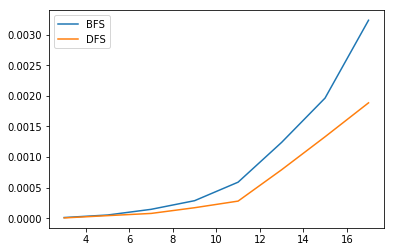

In [7]:
import matplotlib.pyplot as plt

df = result.cumsum()
fig = plt.figure()
df.plot()
plt.savefig('runtime_analysisT.png', dpi=130)

#### Result analysis
The graph tells that BFS gets slow much earlier than DFS if there exists a path. This is because DFS algorithm go further and further at first until it reaches an end, so it can reach the furthest point (the path end) earlier than BFS.

### Performance comparison when the path does NOT exist

In [8]:
# the following 8 examples does NOT have a path
# 3 x 3 grid
grid3 = [[1,1,1],
         [1,0,0],
         [1,0,1]]

# 5 x 5 grid
grid5 = [[1,1,1,1,1],
         [1,0,1,0,1],
         [1,0,1,1,1],
         [1,1,0,0,0],
         [0,1,1,0,1]]

# 7 x 7 grid
grid7 = [[1,1,1,1,0,1,1],
         [1,1,0,1,1,1,1],
         [1,0,1,0,1,0,1],
         [1,0,0,1,1,0,1],
         [1,1,1,0,1,1,1],
         [1,0,0,1,0,1,0],
         [1,1,1,0,1,0,1]]

# 9 x 9 grid
grid9 = [[1,1,1,1,1,1,1,1,1],
         [0,1,0,0,0,1,0,0,1],
         [0,1,1,0,1,1,1,1,1],
         [1,1,0,1,0,0,0,0,1],
         [1,0,1,1,1,1,0,0,1],
         [1,0,0,0,0,1,0,1,1],
         [1,0,1,1,0,1,1,0,1],
         [1,0,1,0,0,1,1,0,0],
         [1,1,1,1,1,1,1,0,1]]

# 11 x 11 grid
grid11 = [[1,1,1,1,1,1,1,1,1,1,1],
          [0,1,0,0,0,1,0,1,0,0,1],
          [1,1,1,1,1,1,1,1,0,1,1],
          [1,0,0,1,0,1,0,1,0,1,1],
          [1,0,0,1,1,0,1,1,0,0,1],
          [1,1,0,1,0,1,0,1,0,0,1],
          [1,1,1,1,0,0,1,0,1,1,1],
          [1,0,1,1,0,0,0,1,1,0,1],
          [1,0,1,0,1,1,1,0,1,0,1],
          [1,0,1,0,1,0,1,0,1,0,0],
          [1,0,1,1,1,0,1,1,1,0,1]]

grid13 = [[1,1,1,1,1,1,1,1,1,1,1,1,1],
          [1,0,0,0,1,0,1,0,1,0,1,0,1],
          [1,1,1,1,1,0,1,1,1,0,1,0,1],
          [1,0,1,0,0,1,0,1,0,1,0,0,1],
          [1,0,1,1,0,1,1,1,1,1,1,1,1],
          [1,1,0,1,0,1,0,0,0,0,0,0,1],
          [1,0,0,1,0,1,1,1,1,1,0,1,1],
          [1,0,1,1,1,0,0,0,0,1,0,0,1],
          [1,0,1,0,0,1,0,0,0,1,0,1,1],
          [1,0,1,1,1,1,1,1,0,1,0,0,1],
          [1,0,1,0,0,1,0,1,1,1,1,0,1],
          [1,0,1,0,1,0,1,0,0,0,1,0,0],
          [1,1,1,1,1,1,1,1,1,1,1,0,1]]

# 15 x 15 grid
grid15 = [[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],
          [1,0,0,0,0,0,0,1,1,0,0,1,0,0,1],
          [1,0,1,1,1,0,1,0,0,1,0,1,0,0,1],
          [1,0,1,0,1,0,1,1,1,1,0,1,1,1,1],
          [1,0,1,0,1,1,0,1,0,1,0,1,0,0,1],
          [1,0,1,1,0,1,0,1,0,1,0,1,0,0,1],
          [1,0,0,1,0,1,1,1,0,1,0,0,1,1,1],
          [1,1,1,1,0,0,0,0,1,1,0,1,1,0,1],
          [1,0,0,0,1,0,1,1,1,0,0,0,1,1,1],
          [1,1,1,0,1,1,1,0,1,1,1,1,0,0,1],
          [1,0,1,0,1,0,0,0,0,0,0,1,0,0,1],
          [1,0,1,0,1,0,1,1,1,0,1,1,1,0,1],
          [1,1,1,0,1,1,0,0,1,0,1,0,1,0,1],
          [0,0,0,0,1,0,0,0,1,0,0,0,1,0,0],
          [1,1,1,1,1,1,1,1,1,0,1,1,1,0,1]]

# 17 x 17 grid
grid17 = [[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],
          [1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1],
          [1,1,1,1,1,0,1,1,1,0,1,0,0,0,1,1,1],
          [1,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0,1],
          [1,1,1,0,1,0,1,1,1,0,1,0,0,0,1,1,1],
          [1,0,0,1,1,0,1,0,0,0,1,0,1,1,1,0,1],
          [1,1,1,0,1,1,1,1,1,0,1,0,1,0,1,1,1],
          [1,0,0,0,1,0,0,0,1,0,1,1,1,0,1,0,1],
          [1,1,1,0,1,0,1,1,1,0,0,0,0,0,1,1,1],
          [1,0,0,0,0,0,1,0,0,1,1,1,0,0,0,0,1],
          [1,1,1,0,0,1,1,0,0,1,0,1,0,0,1,1,1],
          [1,0,0,0,1,1,0,0,0,1,0,1,1,0,1,0,1],
          [1,1,1,0,1,0,0,1,1,1,0,0,1,0,1,1,1],
          [1,0,0,1,1,0,0,1,0,0,1,1,1,0,0,0,0],
          [1,1,1,0,1,1,1,1,0,0,1,0,0,1,1,1,1],
          [0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0],
          [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1]]

grid_data = [grid3, grid5, grid7, grid9,
             grid11, grid13, grid15, grid17]

In [9]:
bfs_data_F, dfs_data_F = [], []
for grid in grid_data:
    timing(grid, 'bfs', bfs_data_F)
for grid in grid_data:
    timing(grid, 'dfs', dfs_data_F)

# make the dataframe from the resultant
result = pd.DataFrame({'BFS': bfs_data_F,
                       'DFS': dfs_data_F}, index=[3, 5, 7, 9, 11, 13, 15, 17])
result

,BFS,DFS
3,0.000021,0.000019
5,0.000052,0.000049
7,0.000122,0.000111
9,0.000254,0.000272
11,0.000498,0.000492
13,0.000869,0.000730
15,0.001225,0.001104
17,0.001993,0.001765


<Figure size 432x288 with 0 Axes>

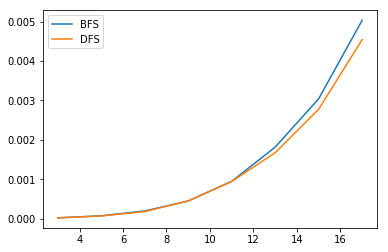

In [10]:
df = result.cumsum()
fig = plt.figure()
df.plot()
plt.savefig('runtime_analysisF.png', dpi=130)

#### Result analysis
The graph says that when it comes to the case where there does not exist a path between two ends, there is no very noticeable difference between BFS and DFS. This is because both algorithms have to visit all nodes in a graph to find a path while they don't have to if a path exists.

### Conclusion
By the result of the above two analysis, we can conclude that DFS can be better than BFS at a certain situation(we conduct this experiment under several restrictions: start & end points are fixed, graph data is not fully randomized, etc) if we just want to find if there exists a path. We can expand this topic more like finding a shortest path or detecting a cycle.